Anggota :
- Paizal Merdijaya
- Alviatul Nazila
- Clarissa Sanindita Reikisyifa

## Perkenalan

### Latar Belakang

Saat ini ekonomi digital sangat berkembang, pemahaman terhadap perilaku penggunaan kartu kredit menjadi esensial bagi lembaga keuangan. Analisis data transaksi kartu kredit menawarkan wawasan mendalam yang dapat membantu dalam mengoptimalkan layanan pelanggan, strategi pemasaran, dan manajemen risiko. Studi ini bertujuan untuk menganalisis berbagai aspek penggunaan kartu kredit, seperti frekuensi pembelian, jenis pembelian, penggunaan uang muka tunai, dan perilaku pembayaran, untuk mengidentifikasi pola yang dapat memberikan informasi strategis bagi bank dalam merancang layanan yang lebih baik dan pengelolaan risiko yang efektif.

### Deskripsi Data

Dataset yang digunakan dalam penelitian ini mengandung informasi mengenai perilaku penggunaan kartu kredit oleh pelanggan sebuah lembaga keuangan. Spesifikasi data adalah sebagai berikut:

Jumlah Data: Dataset ini terdiri dari 8.950 entri

Jumlah Atribut : Data ini memiliki 18 atribut

Sumber Data: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Beberapa kolom penting dalam dataset ini meliputi:
1. CUST_ID: Identifikasi unik untuk setiap pelanggan.
2. BALANCE: Saldo saat ini pada akun kartu kredit.
3. BALANCE_FREQUENCY: Frekuensi pembaruan saldo.
4. PURCHASES: Total pembelian yang dilakukan menggunakan kartu.
5. ONEOFF_PURCHASES: Pembelian sekali bayar.
6. INSTALLMENTS_PURCHASES: Pembelian yang dibayar dalam cicilan.
7. CASH_ADVANCE: Jumlah uang muka tunai yang diambil menggunakan kartu.
8. PURCHASES_FREQUENCY: Frekuensi pembelian.
9. ONEOFF_PURCHASES_FREQUENCY: Frekuensi pembelian sekali bayar.
10. PURCHASES_INSTALLMENTS_FREQUENCY: Frekuensi pembelian cicilan.
11. CASH_ADVANCE_FREQUENCY: Frekuensi uang muka tunai.
12. CASH_ADVANCE_TRX: Jumlah transaksi uang muka tunai.
13. PURCHASES_TRX: Jumlah transaksi pembelian.
14. CREDIT_LIMIT: Batas kredit pada kartu.
15. PAYMENTS: Total pembayaran yang dilakukan oleh pelanggan.
16. MINIMUM_PAYMENTS: Pembayaran minimum yang harus dilakukan oleh pelanggan.
17. PRC_FULL_PAYMENT: Persentase pembayaran penuh dari total tagihan.
18. TENURE: Jangka waktu layanan kartu kredit.

### Tujuan Penelitian

Tujuan penelitian ini adalah untuk mengelompokkan pelanggan menggunakan metode Machine Learning K-Means atau teknik clustering lain, berdasarkan perilaku penggunaan kartu kredit mereka. Setelah menentukan cluster, kami akan menggunakan Principal Component Analysis (PCA) untuk mereduksi dimensi dan memvisualisasikan hasil clustering. Tujuan akhirnya adalah untuk memberikan wawasan bagi lembaga keuangan dalam mengoptimalkan strategi pelayanan dan manajemen risiko.

## Import library

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import silhouette_score

## Data loading

In [2]:
df = pd.read_csv('CC GENERAL.csv')

Pada langkah ini, modul pandas digunakan untuk membaca file CSV tersebut dan menyimpan datanya dalam suatu objek DataFrame. DataFrame merupakan salah satu cara pengorganisasian data di Python yang memungkinkan kita melakukan manipulasi dan analisis data dengan efektif dan efisien.

Setelah file CSV dibaca dan disimpan dalam objek DataFrame, data tersebut dapat diproses dengan menggunakan berbagai pustaka dan modul lainnya yang dibutuhkan untuk mengambil informasi dan melakukan prediksi terhadap data yang ada.

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Fungsi .head() memiliki parameter opsional berupa bilangan bulat yang menentukan jumlah baris data yang ingin ditampilkan, dengan nilai default adalah 5. Dalam kode tersebut, tidak ada parameter yang diinputkan, sehingga hanya 5 baris teratas dari objek DataFrame yang ditampilkan.

In [4]:
# untuk menampilkan data agar lengkap jadi tidak ada ....
pd.set_option('display.max_columns', 500)

Pada kode di atas, fungsi set_option() digunakan untuk mengubah nilai opsi max_columns menjadi 500. Opsi max_columns merupakan suatu parameter yang mengatur jumlah maksimum kolom yang akan ditampilkan pada output DataFrame. Dalam hal ini, nilai opsi tersebut diubah menjadi 500 agar dapat menampilkan seluruh kolom pada DataFrame tanpa adanya pembatasan apapun.

In [5]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Data Cleaning

In [6]:
# Berfungsi/berguna untuk mendapatkan dimensi atau ukuran dari DataFrame
df.shape

(8950, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Kumpulan Data merangkum perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir. File tersebut berada di tingkat pelanggan dengan 18 variabel perilaku.

Berikut Kamus Data untuk dataset Kartu Kredit :-

- CUST_ID : Identifikasi pemegang Kartu Kredit (Kategoris)
- BALANCE : Jumlah saldo yang tersisa di rekeningnya untuk melakukan pembelian (
- BALANCE_FREQUENCY : Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
- PEMBELIAN : Jumlah pembelian yang dilakukan dari akun
- ONEOFF_PURCHASES : Jumlah maksimum pembelian yang dilakukan dalam sekali jalan
- INSTALLMENTS_PURCHASES : Jumlah pembelian yang dilakukan secara cicilan
- CASH_ADVANCE : Uang tunai di muka yang diberikan oleh pengguna
- PURCHASES_FREQUENCY : Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
- ONEOFFPURCHASESFREQUENCY : Seberapa sering Pembelian dilakukan sekaligus (1 = sering dibeli, 0 = tidak sering dibeli)
- PURCHASESINSTALLMENTSFREQUENCY : Seberapa sering pembelian dicicil dilakukan (1 = sering dilakukan, 0 = jarang dilakukan)
- CASHADVANCEFREQUENCY : Seberapa sering pembayaran tunai di muka
- CASHADVANCETRX : Jumlah Transaksi yang dilakukan dengan "Cash in Advanced"
- PURCHASES_TRX : Jumlah transaksi pembelian yang dilakukan
- CREDIT_LIMIT : Limit Kartu Kredit untuk pengguna
- PAYMENTS : Jumlah Pembayaran yang dilakukan oleh pengguna
- MINIMUM_PAYMENTS : Jumlah minimum pembayaran yang dilakukan oleh pengguna
- PRCFULLPAYMENT : Persentase pembayaran penuh yang dibayarkan oleh pengguna
- TENURE : Jangka waktu layanan kartu kredit untuk pengguna

Fungsi .shape adalah salah satu fungsi dasar pada objek DataFrame yang sangat penting dalam melakukan manipulasi dan analisis data. Dengan mengetahui ukuran DataFrame, kita dapat memahami seberapa besar data yang dimiliki dan memastikan bahwa data yang terbaca sudah sesuai dengan harapan.

Output dari kode df.shape adalah sebuah tuple yang berisi jumlah baris dan jumlah kolom pada objek DataFrame. Jumlah jumlah baris mengindikasikan jumlah data yang dimiliki, sedangkan jumlah kolom menjelaskan jumlah fitur atau atribut pada data. Dalam hal ini, DataFrame terdiri dari 8950 baris dan 18 kolom.

In [8]:
# Untuk melihat apakah ada nilai null tiap kolomnya
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Kode df.isnull().sum() adalah suatu fungsi pada objek DataFrame yang digunakan untuk menghitung jumlah nilai null (kosong) pada tiap kolom pada DataFrame.

Fungsi .isnull() digunakan untuk mengubah setiap sel pada DataFrame menjadi nilai True jika value di sel tersebut adalah null, atau False jika value di sel tersebut tidak null. Kemudian, fungsi .sum() digunakan untuk menghitung jumlah nilai True pada setiap kolom pada DataFrame, sehingga didapatkan jumlah nilai null untuk tiap kolom.

Output dari kode df.isnull().sum() berupa DataFrame, di mana setiap kolom merepresentasikan nama kolom pada DataFrame original, dan nilai setiap kolom menunjukkan jumlah nilai null pada kolom tersebut.


Menghitung nilai-nilai yang hilang ini dengan mean

In [9]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

In [10]:
# Untuk melihat apakah ada nilai null tiap kolomnya
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Saat ini DataFrame sudah siap diolah karena sudah dibersihkan

In [11]:
# Melihat apakah ada data yang duplikat
print("Duplicated data :", df.duplicated().sum())

Duplicated data : 0


Fungsi .duplicated() akan menghasilkan suatu nilai Boolean True/False yang menunjukkan apakah ada nilai yang terduplikat. True/False tersebut diterjemahkan ke dalam angka 1/0 dan dijumlahkan dengan .sum() untuk memberikan jumlah data yang diduplikasi. Output dari fungsi tersebut adalah jumlah baris duplikat yang ada pada objek DataFrame.

Dan juga tidak terdapat duplikat data jadi tidak ada data yang sama yang dobel.

## Explorasi Data

In [12]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Fungsi df.describe() adalah suatu fungsi pada objek DataFrame yang digunakan untuk menampilkan statistik deskriptif seperti nilai rata-rata, standar deviasi, nilai minimum dan maksimum, jumlah data, serta kuartil pada tiap kolom yang bernilai numerik.

Output dari fungsi ini akan memberikan informasi ringkas mengenai keseluruhan data numerik pada setiap kolom di DataFrame df

. Output ditampilkan dalam format tabel, dengan tiap baris merepresentasikan hasil statistik deskriptif pada tiap kolom attribute.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13740\3098350674.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


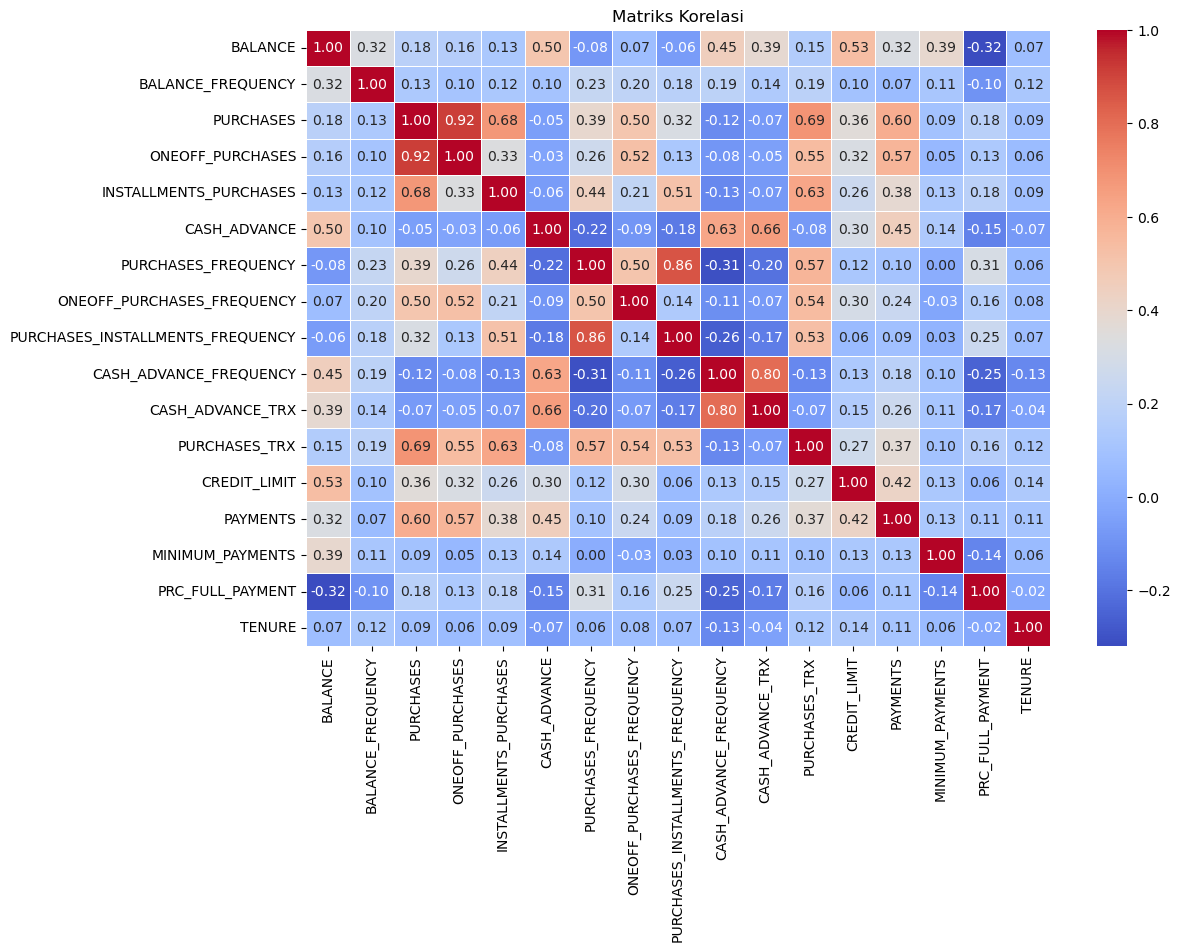

In [13]:
# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()

Dalam bentuk visual ini, kita dapat melihat intensitas hubungan antar variabel. Warna pada skala dari warna biru muda  ke coklat gelap menyoroti sejauh mana hubungan positif atau negatif antar variabel, dengan warna yang lebih gelap menunjukkan korelasi yang lebih kuat,di mana nilai mendekati 1 menunjukkan keterkaitan positif yang kuat, sementara nilai mendekati -1 menunjukkan keterkaitan negatif yang kuat serta Nilai yang mendekat1 0 menunjukkan tidak ada korelasi yang signifikan.

In [14]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:
    Range = c + '_RANGE'
    df[Range] = 0        
    df.loc[((df[c] > 0) & (df[c] <= 500)), Range] = 1
    df.loc[((df[c] > 500) & (df[c] <= 1000)), Range] = 2
    df.loc[((df[c] > 1000) & (df[c] <= 3000)), Range] = 3
    df.loc[((df[c] > 3000) & (df[c] <= 5000)), Range] = 4
    df.loc[((df[c] > 5000) & (df[c] <= 10000)), Range] = 5
    df.loc[(df[c] > 10000), Range] = 6

Perintah diatas bertujuan untuk membuat variabel kategorikal baru pada dataset, yang dinamakan dengan menambahkan "_RANGE" di belakang nama beberapa kolom tertentu. Variabel kategorikal baru ini didesain untuk mengelompokkan data ke dalam rentang-nilai tertentu berdasarkan kriteria-kriteria yang telah ditentukan.

In [15]:
columns = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
           'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:
    Range = c + '_RANGE'
    df[Range] = 0
    df.loc[((df[c] > 0) & (df[c] <= 0.1)), Range] = 1
    df.loc[((df[c] > 0.1) & (df[c] <= 0.2)), Range] = 2
    df.loc[((df[c] > 0.2) & (df[c] <= 0.3)), Range] = 3
    df.loc[((df[c] > 0.3) & (df[c] <= 0.4)), Range] = 4
    df.loc[((df[c] > 0.4) & (df[c] <= 0.5)), Range] = 5
    df.loc[((df[c] > 0.5) & (df[c] <= 0.6)), Range] = 6
    df.loc[((df[c] > 0.6) & (df[c] <= 0.7)), Range] = 7
    df.loc[((df[c] > 0.7) & (df[c] <= 0.8)), Range] = 8
    df.loc[((df[c] > 0.8) & (df[c] <= 0.9)), Range] = 9
    df.loc[((df[c] > 0.9) & (df[c] <= 1.0)), Range] = 10

Perintah di atas bertujuan untuk membuat variabel kategorikal baru pada dataset. Sama seperti perintah sebelumnya, variabel baru ini dinamakan dengan menambahkan "_RANGE" di belakang nama beberapa kolom tertentu. Tujuan dari pembuatan variabel kategorikal ini adalah untuk mengelompokkan data ke dalam rentang-nilai tertentu berdasarkan tingkat frekuensi yang telah ditentukan.

In [16]:
columns = ['PURCHASES_TRX', 'CASH_ADVANCE_TRX']

for c in columns:
    Range = c + '_RANGE'
    df[Range] = 0
    df.loc[((df[c] > 0) & (df[c] <= 5)), Range] = 1
    df.loc[((df[c] > 5) & (df[c] <= 10)), Range] = 2
    df.loc[((df[c] > 10) & (df[c] <= 15)), Range] = 3
    df.loc[((df[c] > 15) & (df[c] <= 20)), Range] = 4
    df.loc[((df[c] > 20) & (df[c] <= 30)), Range] = 5
    df.loc[((df[c] > 30) & (df[c] <= 50)), Range] = 6
    df.loc[((df[c] > 50) & (df[c] <= 100)), Range] = 7
    df.loc[((df[c] > 100)), Range] = 8

Perintah ini bertujuan untuk membuat variabel kategorikal baru pada dataset. Sama seperti perintah-perintah sebelumnya, variabel baru ini dinamakan dengan menambahkan "_RANGE" di belakang nama beberapa kolom tertentu. Tujuan dari pembuatan variabel kategorikal ini adalah untuk mengelompokkan data ke dalam rentang-nilai tertentu berdasarkan jumlah transaksi pembelian ('PURCHASES_TRX') dan jumlah transaksi penarikan tunai ('CASH_ADVANCE_TRX').

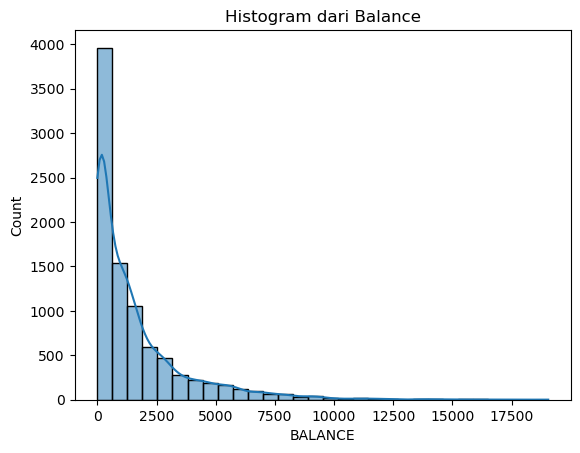

In [17]:
# Histogram
sns.histplot(df['BALANCE'], bins=30, kde=True)
plt.title('Histogram dari Balance')
plt.show()

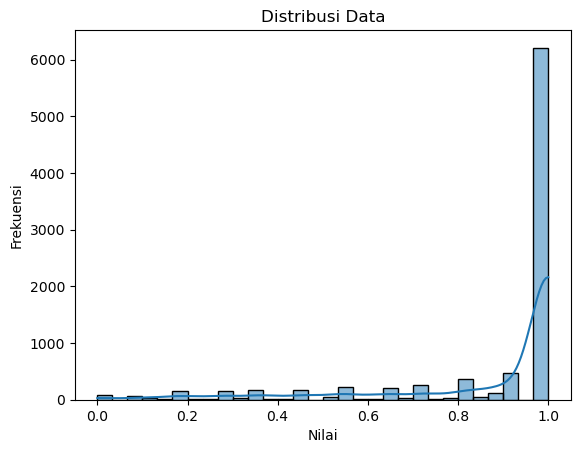

In [18]:
sns.histplot(df['BALANCE_FREQUENCY'], bins=30, kde=True)
plt.title('Distribusi Data')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

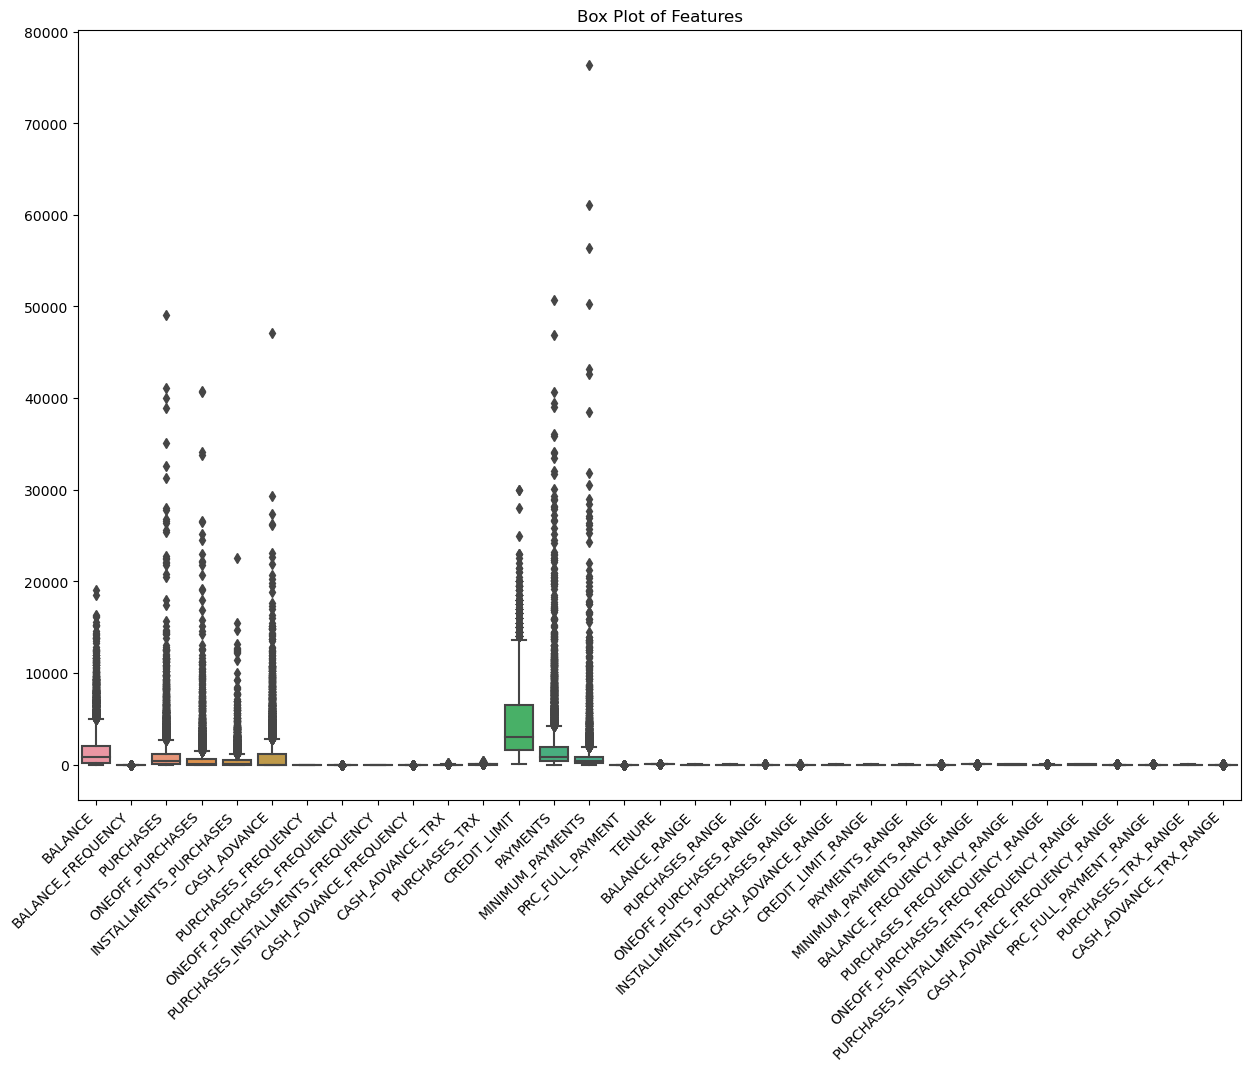

In [19]:
plt.figure(figsize=(15, 10))
box_plot = sns.boxplot(data=df)
plt.title('Box Plot of Features')

# Rotasi label pada sumbu x
box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()


In [20]:
Q1 = df['BALANCE'].quantile(0.25)
Q3 = df['BALANCE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['BALANCE'] < lower_bound) | (df['BALANCE'] > upper_bound)]
print("Jumlah outlier:", len(outliers))
print("Outlier:", outliers)


Jumlah outlier: 695
Outlier:      CUST_ID       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
15    C10016   6886.213231           1.000000    1611.70              0.00   
21    C10022   6369.531318           1.000000    6359.95           5910.04   
24    C10025   5368.571219           1.000000       0.00              0.00   
28    C10029   7152.864372           1.000000     387.05            204.55   
30    C10031  12136.219960           1.000000    3038.01           1013.20   
...      ...           ...                ...        ...               ...   
8309  C18530   6008.914524           0.777778       0.00              0.00   
8411  C18637   5934.610587           1.000000       0.00              0.00   
8438  C18666   5484.339435           1.000000       0.00              0.00   
8705  C18942   7302.672686           1.000000       0.00              0.00   
8941  C19182   5967.475270           0.833333     214.55              0.00   

      INSTALLMENTS_PURCHASES  CASH

Fungsi ini membantu Anda mengidentifikasi nilai-nilai dalam fitur 'BALANCE' yang berada di luar rentang yang dianggap sebagai nilai normal berdasarkan IQR. Dengan demikian, Anda dapat melihat distribusi data dan menemukan nilai-nilai yang mungkin perlu diperiksa lebih lanjut karena karakteristiknya yang tidak biasa.

## Data Preprocessing

In [21]:
col_norm = df.select_dtypes(include=['float64']).columns
scaler = MinMaxScaler()
df[col_norm] = scaler.fit_transform(df[col_norm])
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
0,C10001,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,0.031720,0.003979,0.001826,0.000000,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0
1,C10002,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,4,0,0.232053,0.080893,0.014034,0.222222,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1
2,C10003,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,0.248748,0.012264,0.008210,0.000000,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0
3,C10004,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,1,1,0.248748,0.000000,0.011310,0.000000,12,3,3,3,0,1,5,0,2,7,1,1,0,1,0,1,1
4,C10005,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,0.038397,0.013374,0.003204,0.000000,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0


In [22]:
df.drop(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

X= np.asarray(df)

Dalam operasi baris di atas, beberapa kolom yang disebutkan di atas dihapus dari DataFrame. Operasi ini dilakukan dengan menggunakan metode drop dari pandas. axis=1 menunjukkan bahwa penghapusan dilakukan pada kolom, dan inplace=True berarti perubahan dilakukan secara langsung pada DataFrame yang ada tanpa perlu menyimpannya dalam DataFrame baru.

In [23]:
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(8950, 17)

In [24]:
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_) 

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The 

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Kode di atas mencoba untuk menghitung nilai inersia (inertia) dari model KMeans dengan jumlah kluster (n_clusters) yang bervariasi dari 1 hingga n_clusters-1. Nilai inersia dihitung menggunakan atribut inertia_ dari objek KMeans setelah dilatih.

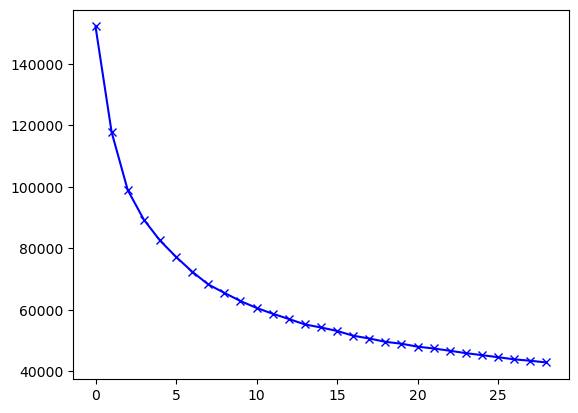

In [25]:
plt.plot(cost, 'bx-')

In [26]:
kmean= KMeans(6)
kmean.fit(X)
labels=kmean.labels_

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Perintah di atas digunakan untuk melakukan clustering menggunakan algoritma KMeans dengan jumlah kluster (clusters) sebanyak 6 (n_clusters=6). Proses ini melibatkan pemodelan data dengan mengelompokkan observasi ke dalam kelompok yang saling mendekati berdasarkan pola yang ada dalam fitur-fitur yang dipertimbangkan.

In [27]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,cluster
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0,1
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1,5
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0,2
3,12,3,3,3,0,1,5,0,2,7,1,1,0,1,0,1,1,1
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0,1


Perintah di atas digunakan untuk menggabungkan dataframe df dengan label kluster yang dihasilkan dari model KMeans ke dalam dataframe baru yang disebut clusters. Proses ini akan menambahkan kolom baru bernama 'cluster' yang berisi label kluster untuk setiap observasi.

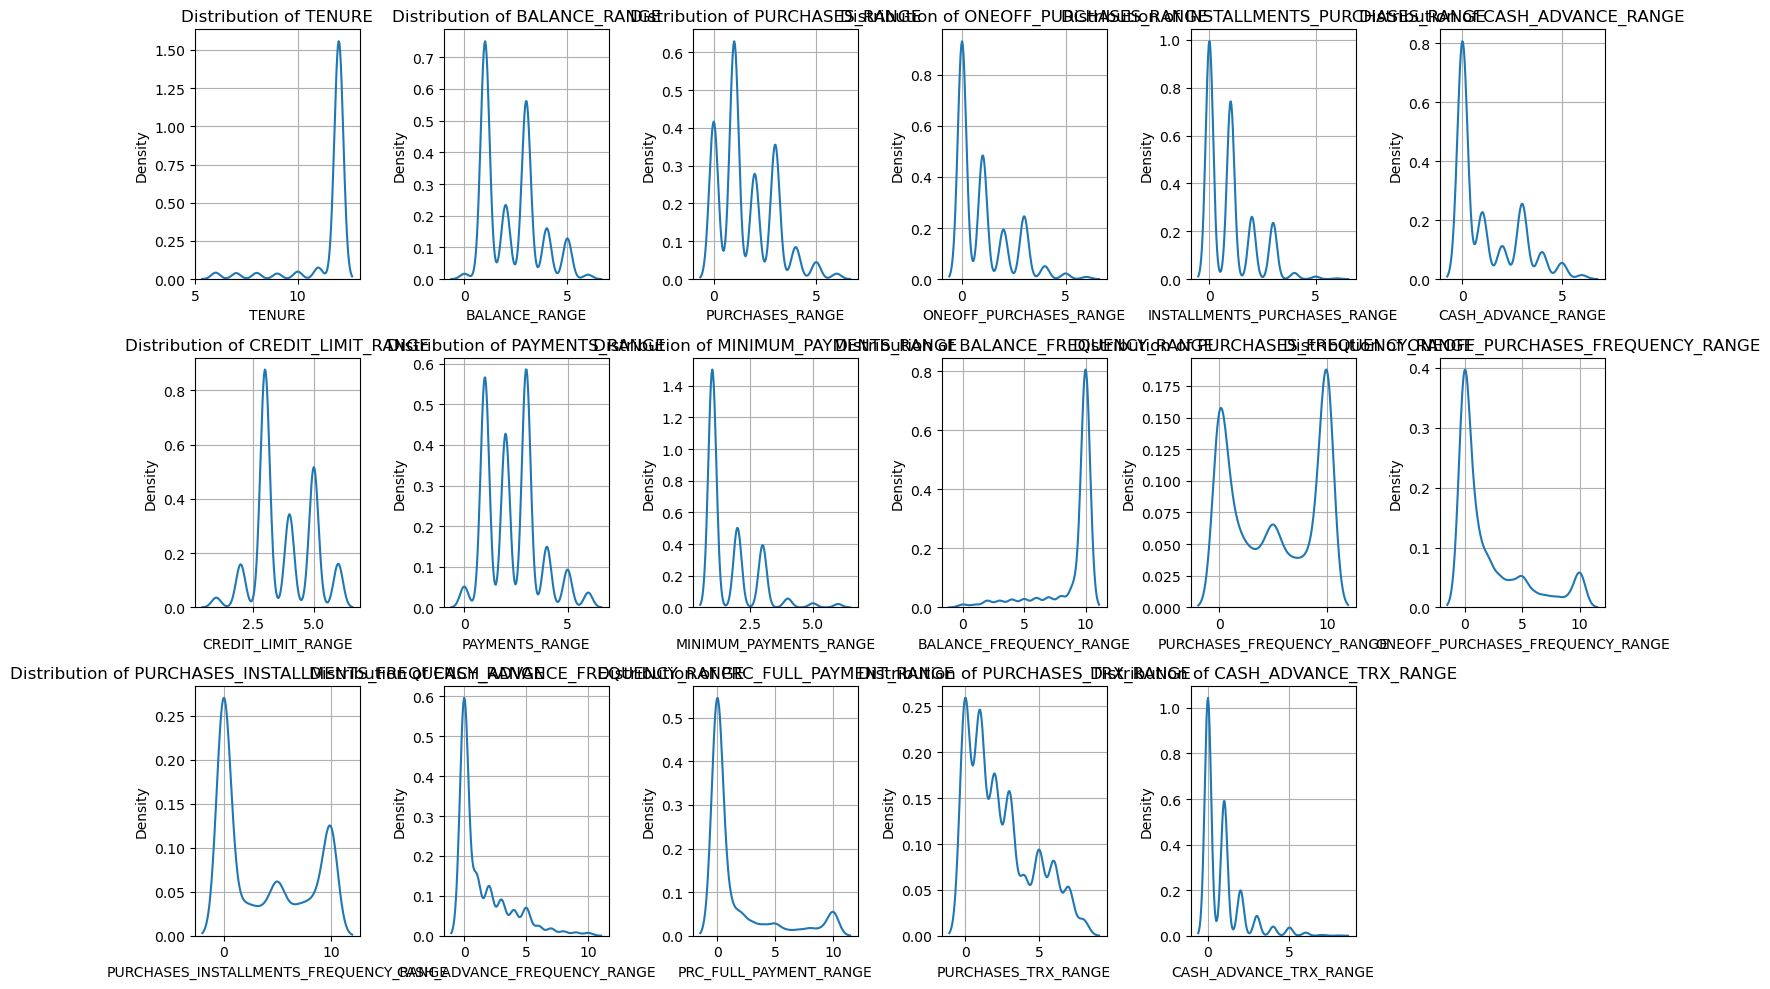

In [28]:
plt.figure(figsize=(15, 10))

r = 3
c = 6
it = 1

for i in df.columns:
    plt.subplot(r, c, it)
    sns.kdeplot(df[i])
    plt.title(f'Distribution of {i}')
    plt.grid()
    it += 1

plt.tight_layout()
plt.show()

Perintah di atas digunakan untuk membuat visualisasi distribusi menggunakan kernel density estimation (KDE) untuk setiap kolom dalam dataframe df. 

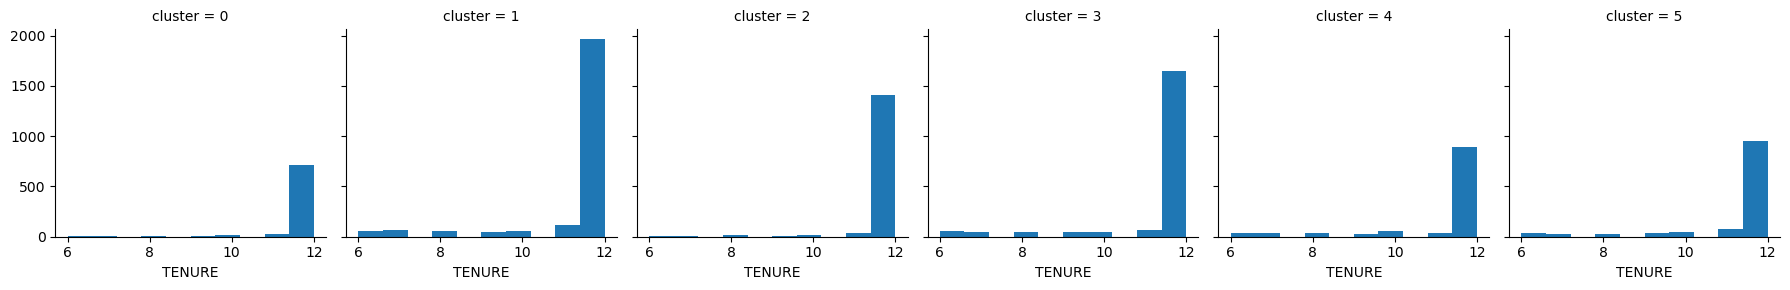

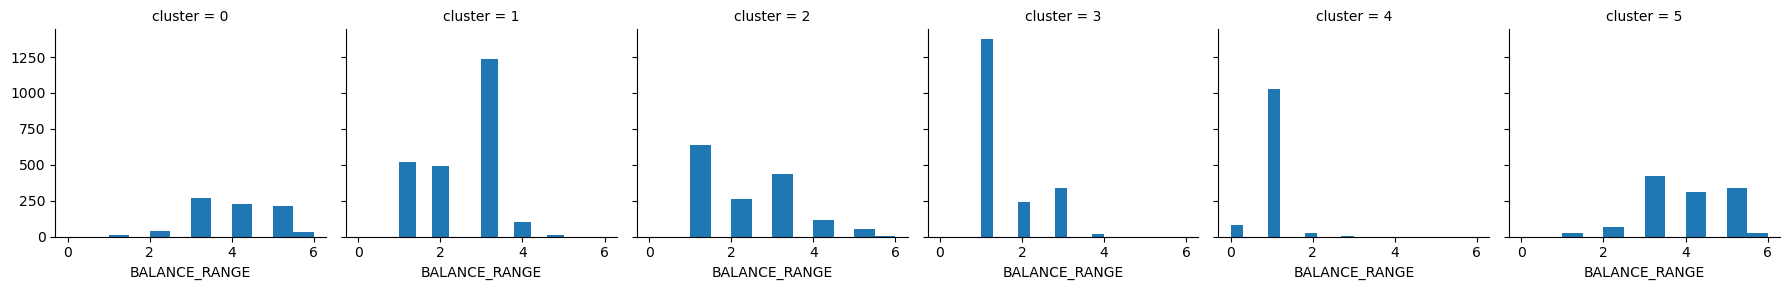

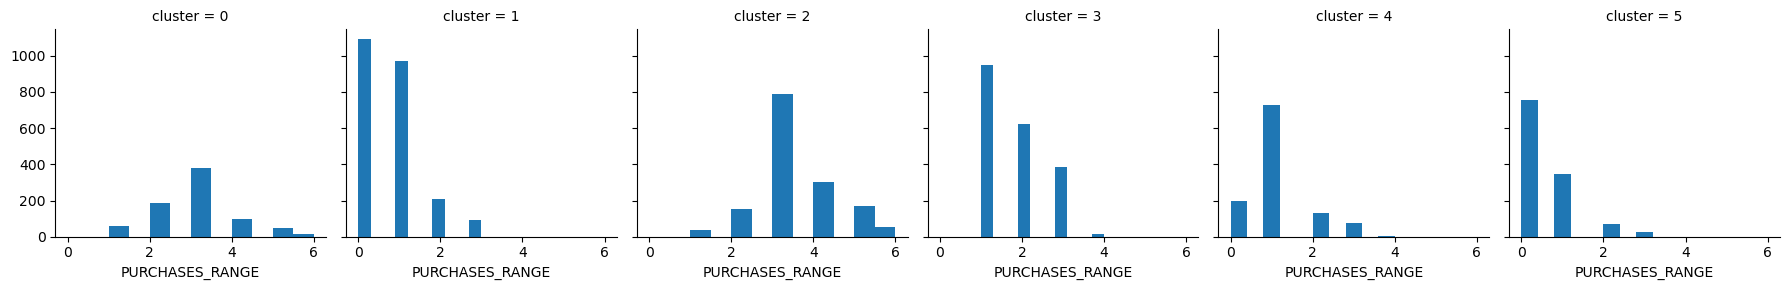

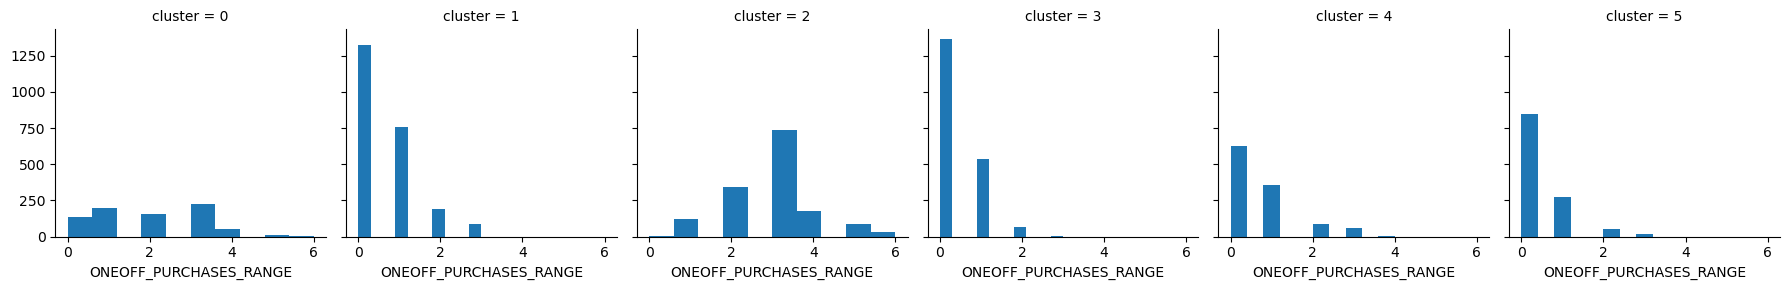

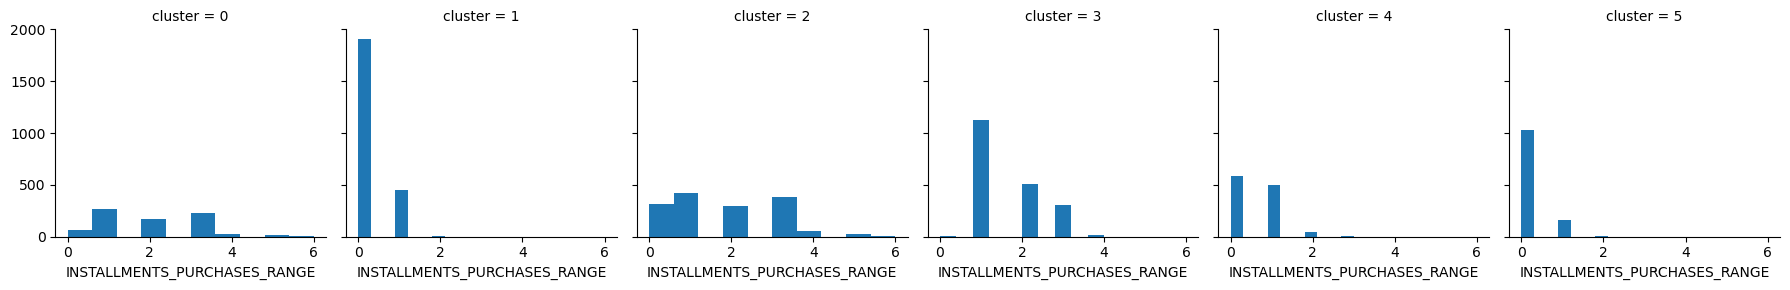

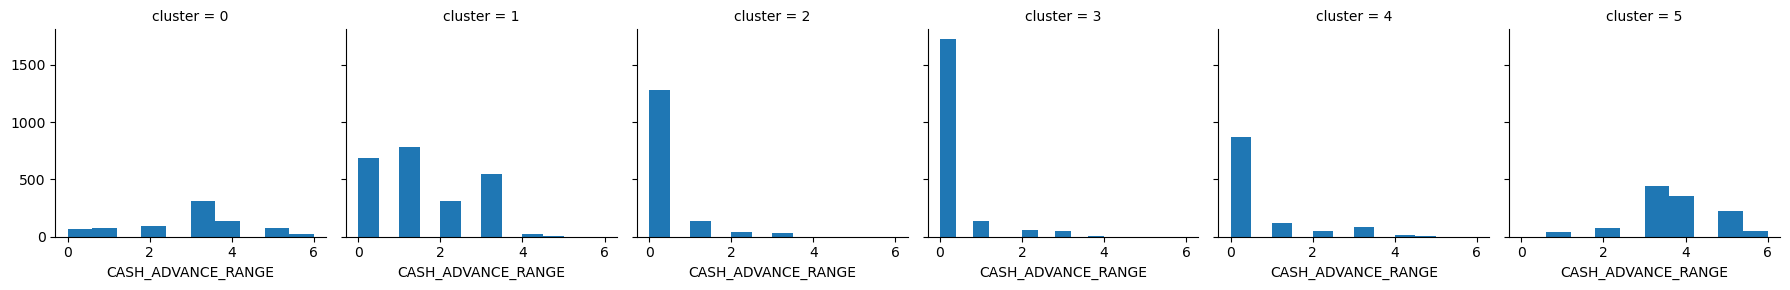

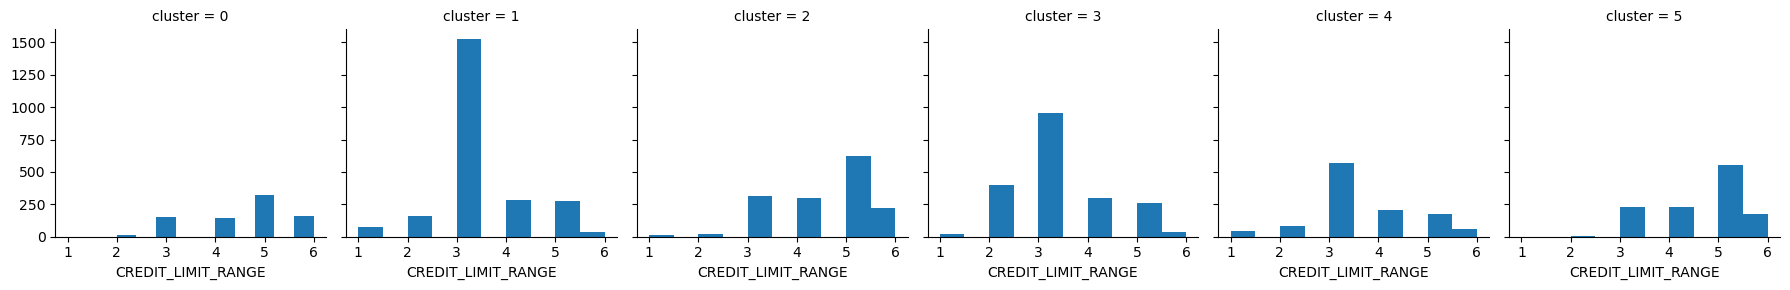

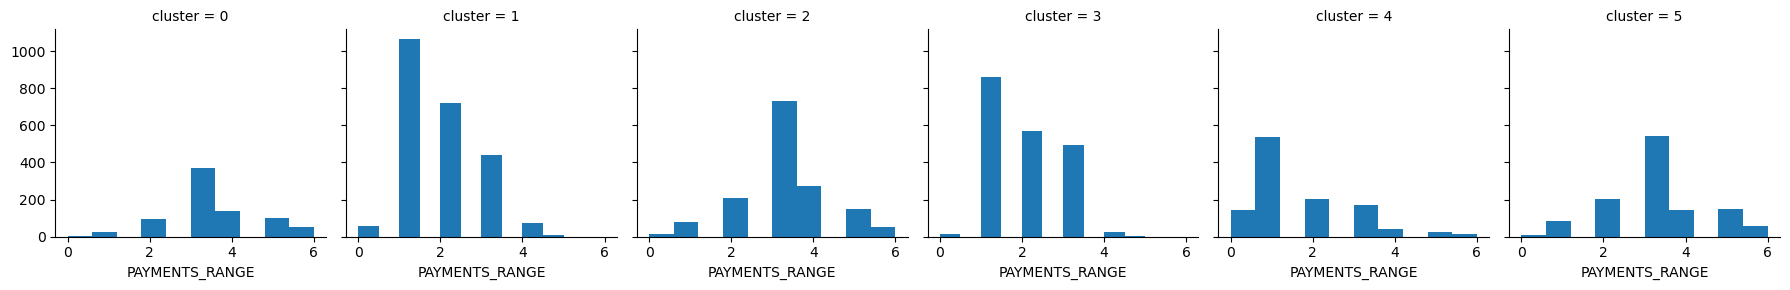

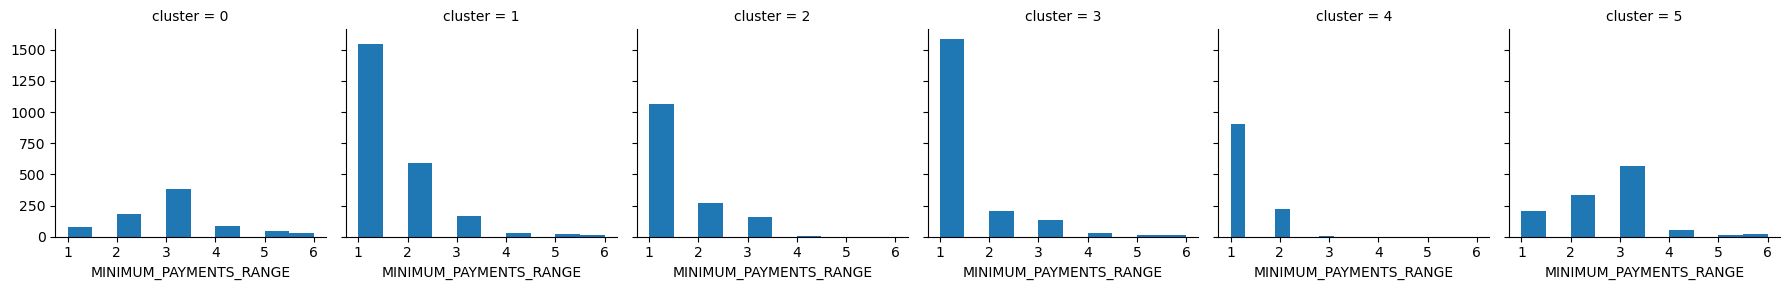

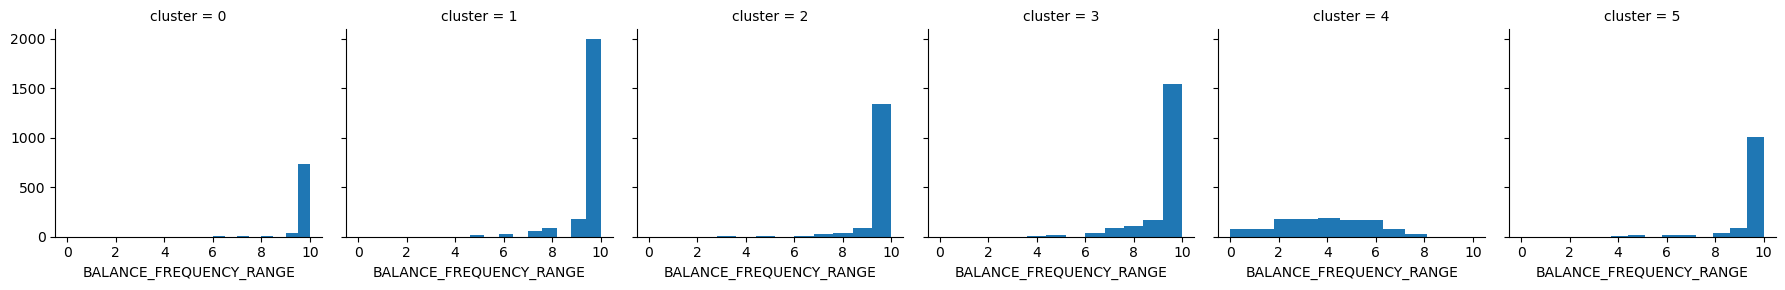

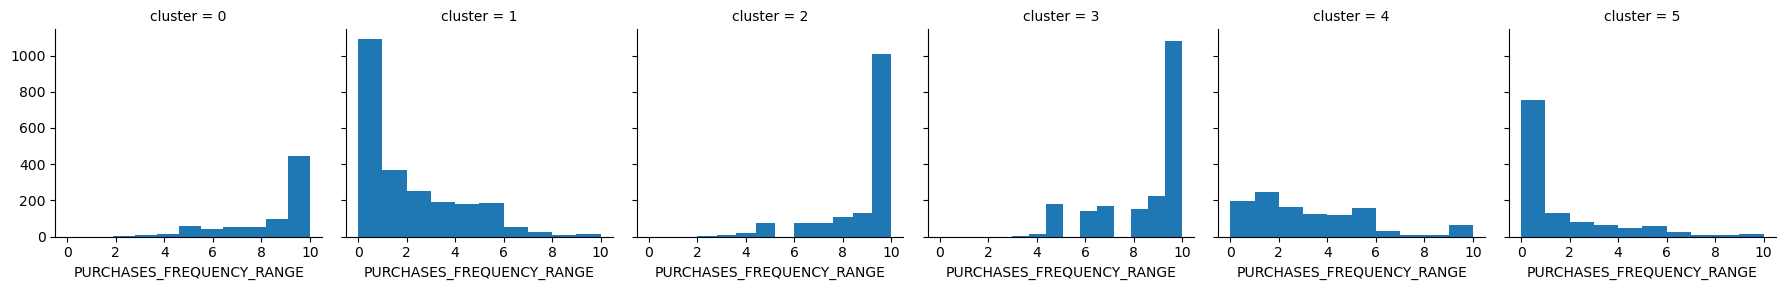

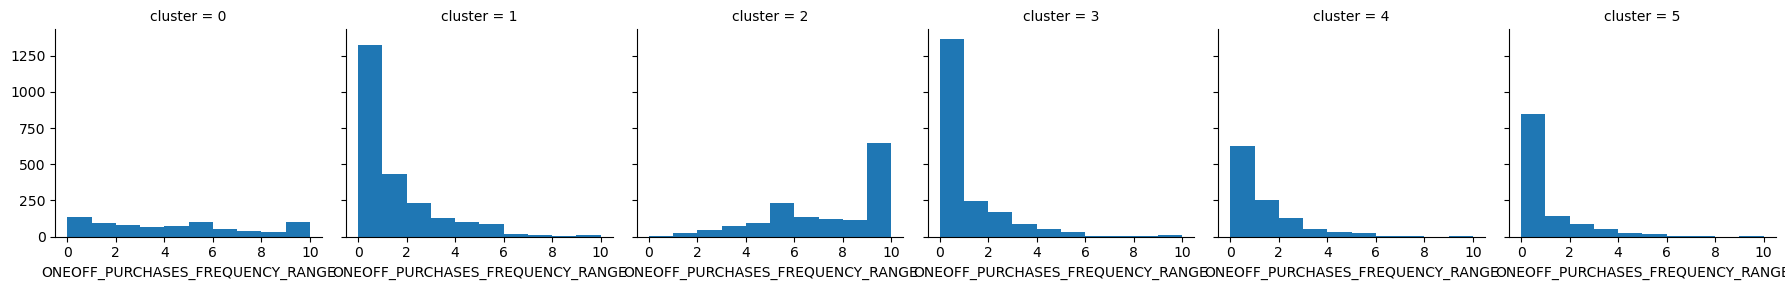

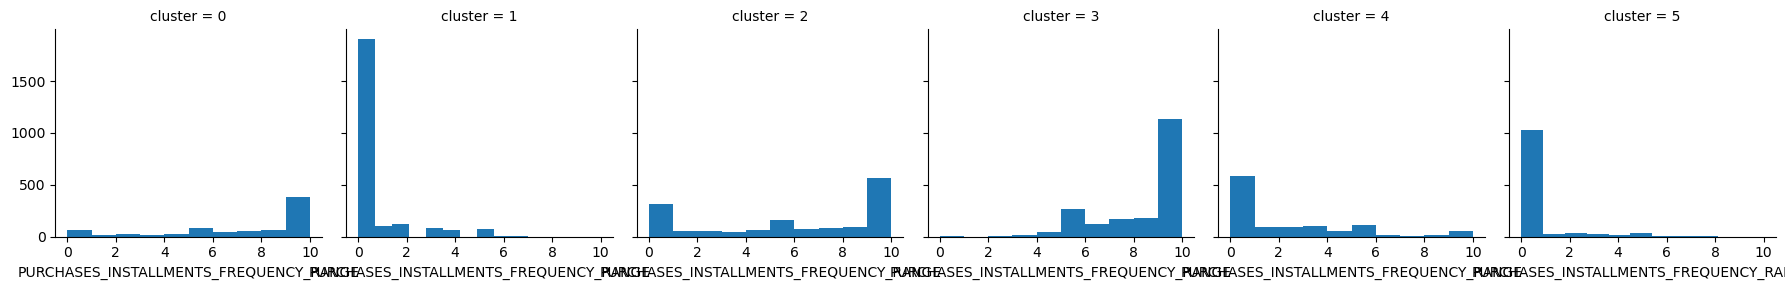

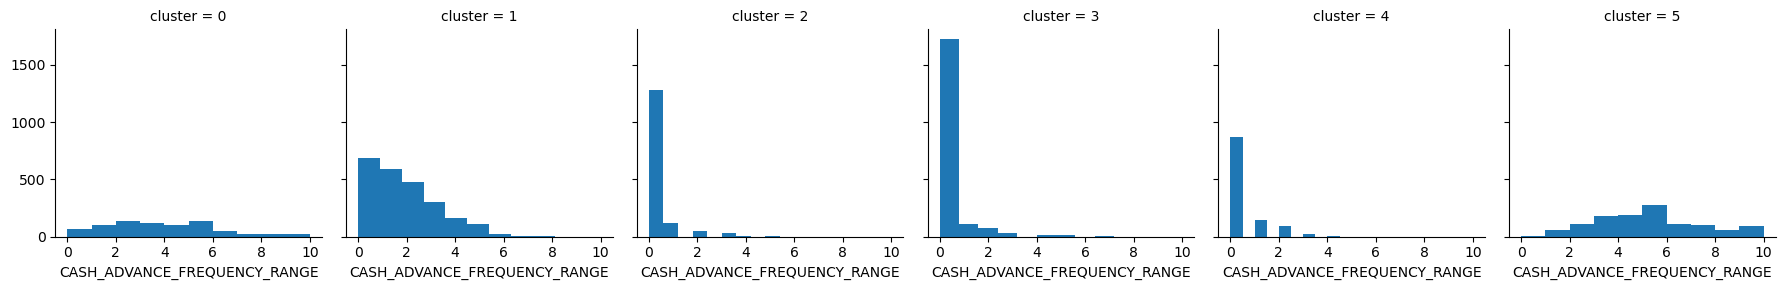

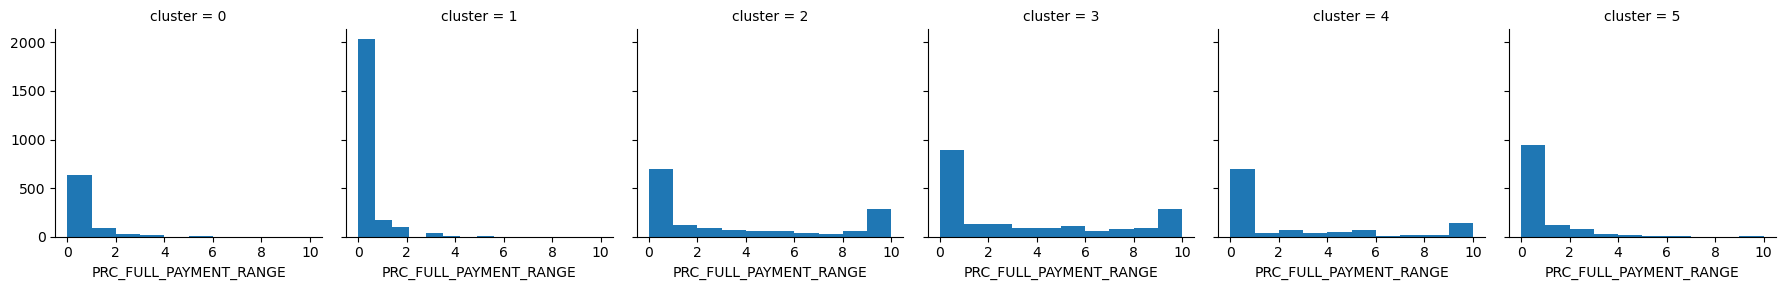

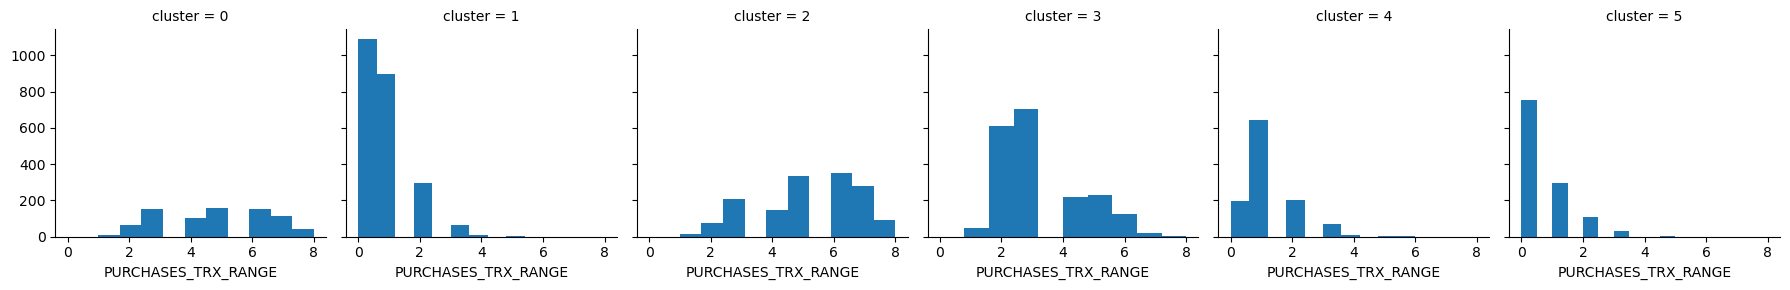

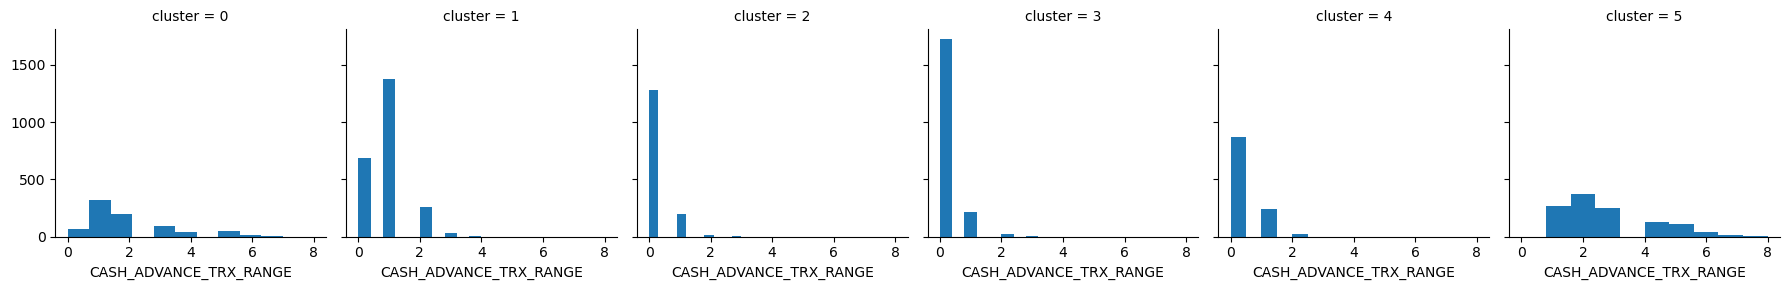

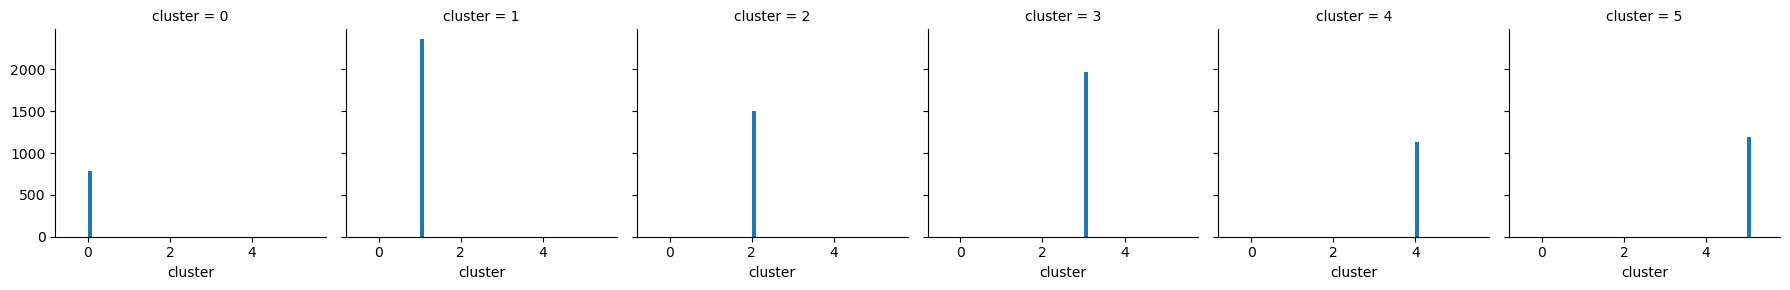

In [29]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

- Cluster0 Orang dengan batas kredit rata-rata hingga tinggi yang melakukan semua jenis pembelian

- Cluster1 Kelompok ini mempunyai lebih banyak orang yang telah membayar jatuh tempo dan lebih sering mengambil uang tunai di muka

- Cluster2 Pembelanja lebih sedikit uang dengan batas kredit rata-rata hingga tinggi yang sebagian besar membeli dengan mencicil

- Cluster3 Orang dengan batas kredit tinggi yang mengambil lebih banyak uang tunai di muka

- Cluster4 Pembelanja tinggi dengan batas kredit tinggi yang melakukan pembelian mahal

- Cluster5 Orang yang tidak mengeluarkan banyak uang dan memiliki batas kredit rata-rata hingga tinggi

## Pendefinisian model

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The 

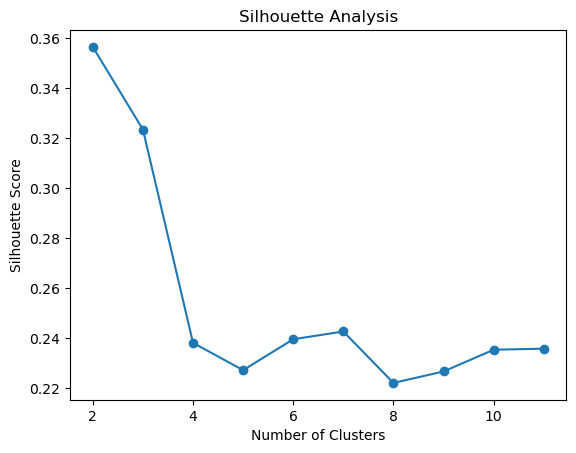

In [30]:
# Menggunakan semua kolom numerik sebagai atribut
X = df.select_dtypes(include=['float64', 'int64']).values

# Menentukan jumlah cluster dengan Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    score = silhouette_score(X, preds)
    silhouette_scores.append(score)

# Membuat grafik Silhouette Plot
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

In [31]:
# Jumlah cluster yang diinginkan
num_clusters = 3

# Melakukan KMeans clustering dengan metode K-Means++
kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
kmeans.fit(X)

# Mendapatkan label cluster untuk setiap data
labels = kmeans.labels_

# Menghitung Silhouette Score
score = silhouette_score(X, labels)
print('Silhouette Score:', score)

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.3233764417626257


Silhouette Score adalah metrik evaluasi yang digunakan untuk mengukur sejauh mana sebuah objek dalam suatu cluster serupa dengan satu sama lain (cohesive) dan sejauh mana cluster berbeda satu sama lain (separated). Nilai silhouette score berkisar dari -1 hingga 1. Dalam kasus ini Silhouette Score:0.3233764417626257

In [32]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Tambahkan informasi pusat klaster ke dalam DataFrame
cluster_centers = kmeans.cluster_centers_
cluster_center_df = pd.DataFrame(cluster_centers)  # Mengubah baris ini
df_clustered = df.join(cluster_center_df, rsuffix='_center')

# Cetak pusat klaster dan label
print("Pusat Klaster:")
print(cluster_center_df)
print("\nDataFrame Terklaster:")
print(df_clustered)

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Pusat Klaster:
          0         1         2         3         4         5         6   \
0  11.425395  2.486547  0.783189  0.641094  0.224817  1.795197  3.694463   
1  11.506177  1.831759  1.852108  0.494186  1.672238  0.573038  3.490916   
2  11.778366  2.509112  3.306878  2.865373  1.664315  0.857143  4.466196   

         7         8         9         10        11        12        13  \
0  2.156994  1.712697  8.476318  1.485879  0.989104  0.504336  2.197687   
1  2.076308  1.573401  9.112282  8.532703  0.753634  8.097747  0.670058   
2  3.227513  1.699001  9.840682  9.247501  7.733686  5.750735  1.098765   

         14        15        16  
0  0.667779  0.741606  1.214588  
1  2.575581  3.353198  0.375727  
2  2.660200  5.390359  0.634921  

DataFrame Terklaster:
      TENURE  BALANCE_RANGE  PURCHASES_RANGE  ONEOFF_PURCHASES_RANGE  \
0         12              1                1                       0   
1         12              4                0                       0   
2   

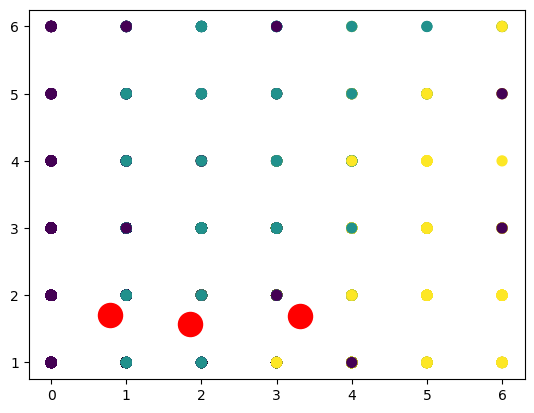

In [33]:
# Plot data points
plt.scatter(X[:, 2], X[:, 8], s=50, c=kmeans.labels_, cmap='viridis')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 8], s=300, c='red')
plt.show()

# Simpan model pickle

In [34]:
# Buat model KMeans dengan jumlah cluster tertentu
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X)

# Simpan model ke file menggunakan pickle
with open('kmeans_model.pkl', 'wb') as model_file:
    pickle.dump(kmeans, model_file)

## Pengambilan Kesimpulan

Berdasarkan analisis dataset perilaku penggunaan kartu kredit, ditemukan beberapa pola dalam penggunaan kartu kredit oleh pelanggan sebuah lembaga keuangan. Tujuan utama dari penelitian ini adalah untuk memberikan wawasan bagi lembaga keuangan dalam mengoptimalkan strategi pelayanan dan manajemen risiko.

Dalam penelitian ini, digunakan metode Machine Learning K-Means atau teknik clustering lain, untuk mengelompokkan pelanggan berdasarkan perilaku penggunaan kartu kredit mereka, dan dihasilkan enam cluster dengan karakteristik yang berbeda-beda.

Selain itu, dilakukan juga analisis korelasi antar variabel untuk melihat intensitas hubungan antar variabel dengan warna yang lebih gelap menunjukkan korelasi yang lebih kuat.

Hasil analisis tersebut dapat membantu lembaga keuangan dalam merancang layanan yang lebih baik dan mengoptimalkan strategi pemasaran. Nilai Silhouette Score yang didapatkan sebesar 0.3233764417626257 menunjukkan bahwa hasil clustering cukup reliabel. Oleh karena itu, penelitian ini dapat menjadi acuan bagi lembaga keuangan untuk meningkatkan kualitas layanan dan pengelolaan risiko dengan memanfaatkan data transaksi kartu kredit.